In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

import neuralnet 

In [3]:
# gps = synth_gen.GPsampler(gamma=10)
# f = gps.get_func()

In [4]:
f = lambda x: 2*np.tanh(x) + 2*np.sin(2*x) + x**3

In [5]:
target = 1 # By defaul X->Y
nb_samples = 75

Nx = {'name': 'uniform', 'var': 10}
Ny = {'name': 'normal', 'var': 80}#0.3}
# Ny = {'name': 'normal', 'var': 0.6}

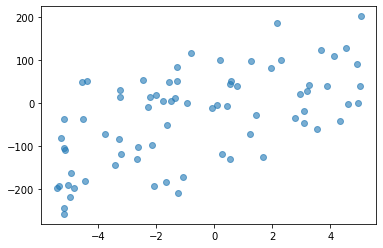

In [6]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y
plt.scatter(x, y, alpha=.6)

In [45]:
params = {'norm': True, 'learning_rate':1e-1, 'epochs': 4000, 'H': 100}
net = neuralnet.Net(params)

In [46]:
net.train(x, y)

In [47]:
xs = np.linspace(min(x), max(x), 100)
ys = net.predict(xs)

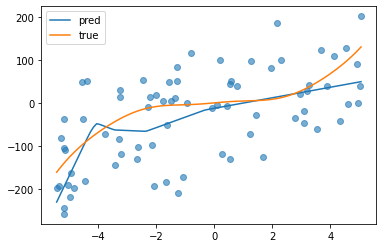

In [48]:
plt.scatter(x, y, alpha=.6)
plt.plot(xs, ys, label='pred')
plt.plot(xs, f(xs), label='true')
plt.legend()